## Analyzing Quality of Life

## 1. Reading and normalizing the files

In [70]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [71]:
import pandas as pd

#Reading files CITIES from countries
xls = pd.ExcelFile('/Users/ivettesulca/Desktop/EDA_Visualization/Project/Quality_life_country.xlsx')
df_country = pd.read_excel(xls,'City')

df_country.columns=['Rank','City','Quality_life','Purchasing','Safety','Health_care','Cost_living','Property_price_income','Traffic_commute','Pollution','Climate']
df_country.head()


,Rank,City,Quality_life,Purchasing,Safety,Health_care,Cost_living,Property_price_income,Traffic_commute,Pollution,Climate
0,1,"Canberra, Australia",218.69,126.22,80.48,82.23,73.54,5.17,23.78,12.14,82.72
1,2,"Raleigh, NC, United States",212.87,151.43,68.24,75.01,72.16,2.60,32.16,20.83,83.88
2,3,"Adelaide, Australia",205.90,121.34,68.75,76.26,68.26,4.67,28.12,20.41,94.96
3,4,"Wellington, New Zealand",203.21,105.06,70.65,74.12,71.38,6.33,27.63,13.59,97.68
4,5,"Madison, WI, United States",202.04,127.48,70.88,78.51,66.70,3.26,23.73,16.80,51.64


In [72]:
##########Reading files COUNTRIES worlwide#############

xls = pd.ExcelFile('/Users/ivettesulca/Desktop/EDA_Visualization/Project/Quality_life_country.xlsx')
df_worlwide = pd.read_excel(xls,'Country')

df_worlwide.columns=['Rank','City','Quality_life','Purchasing','Safety','Health_care','Cost_living','Property_price_income','Traffic_commute','Pollution','Climate']
df_worlwide.head()

#Normalizing indexes Worlwide
df_worlwide_normalized = pd.DataFrame(columns=['Rank', 'City','Value_kpi','Type_kpi','Kpi_norm'])

for col in df_worlwide.columns:
        if (col!='Rank' and col!='City' ):
            df_aux=df_worlwide[['Rank','City', col]]
            df_aux.columns=['Rank','City', 'Value_kpi']
            df_aux['Type_kpi']=col
            #print(df_aux)
            
            max_value=df_worlwide[col].max()
            min_value = df_worlwide[col].min()
            
            if col in ['Cost_living','Property_price_income','Traffic_commute','Pollution']:
                df_aux['Kpi_norm'] =1-((df_worlwide[col] - min_value) / (max_value - min_value))
            else:
                df_aux['Kpi_norm'] =((df_worlwide[col] - min_value) / (max_value - min_value))


            df_worlwide_normalized=pd.concat([df_worlwide_normalized,df_aux])
            
df_worlwide_normalized.head()

/Users/ivettesulca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/ivettesulca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ivettesulca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,Rank,City,Value_kpi,Type_kpi,Kpi_norm
0,1.0,Denmark,196.47,Quality_life,1.000000
1,2.0,Switzerland,196.08,Quality_life,0.996933
2,3.0,Finland,195.06,Quality_life,0.988912
3,4.0,Australia,189.73,Quality_life,0.947000
4,5.0,Iceland,188.12,Quality_life,0.934340


In [85]:
##Reading quality of life indexes####
xls = pd.ExcelFile('/Users/ivettesulca/Desktop/EDA_Visualization/Project/Data_quality_life.xlsx')
df1 = pd.read_excel(xls, '2017_midyear')
df1['year_month']='2017-06-01'
df2 = pd.read_excel(xls, '2017')
df2['year_month']='2017-12-01'
df3 = pd.read_excel(xls, '2018_midyear')
df3['year_month']='2018-06-01'
df4 = pd.read_excel(xls, '2018')
df4['year_month']='2018-12-01'
df5 = pd.read_excel(xls, '2019')
df5['year_month']='2019-12-01'
df6 = pd.read_excel(xls, '2019_midyear')
df6['year_month']='2019-06-01' 

df_quality_total = pd.concat([df1,df2,df3,df4,df5,df6])
df_quality_total.columns=['Rank','City','Quality_life','Purchasing','Safety','Health_care','Cost_living','Property_price_income','Traffic_commute','Pollution','Climate','Year_month']

df_quality_total['City_name']=df_quality_total["City"].str.split(",", n = 2, expand = True)[0]
df_quality_total['State_name']=df_quality_total["City"].str.split(",", n = 2, expand = True)[1]


,Rank,City,Quality_life,Purchasing,Safety,Health_care,Cost_living,Property_price_income,Traffic_commute,Pollution,Climate,Year_month,City_name,State_name
0,1,"Raleigh, NC, United States",202.88,137.76,74.52,75.90,75.81,2.38,31.55,20.33,81.08,2017-06-01,Raleigh,NC
1,2,"Dallas, TX, United States",183.65,171.08,55.62,65.93,70.47,2.04,37.74,44.87,77.89,2017-06-01,Dallas,TX
2,3,"Columbus, OH, United States",183.51,127.65,54.90,69.47,72.48,2.14,25.25,25.79,70.99,2017-06-01,Columbus,OH
3,4,"San Diego, CA, United States",183.28,129.95,64.50,73.68,79.89,5.05,40.45,32.16,96.81,2017-06-01,San Diego,CA
4,5,"Portland, OR, United States",180.41,122.71,55.71,64.97,81.72,4.44,31.42,23.74,89.40,2017-06-01,Portland,OR


In [107]:
#Normalizing indexes of quality of life
df_spider=df_quality_total


df_total_normalized = pd.DataFrame(columns=['Rank', 'City','City_name','State_name','Year_month','KPI_value','type_kpi'])
for col in df_quality_total.columns:
        #print(col)
        if (col!='Rank' and col!='City' and col!='City_name' and col!='State_name' and col!='Year_month' ):
            df_aux=df_quality_total[['Rank','City', 'City_name','State_name','Year_month',col]]
            df_aux.columns=['Rank','City','City_name','State_name','Year_month','KPI_value']
            df_aux['type_kpi']=col
            #print(df_aux)
            
            max_value=df_quality_total[col].max()
            min_value = df_quality_total[col].min()
            
            if col in ['Cost_living','Property_price_income','Traffic_commute','Pollution']:
                df_aux['Kpi_norm'] =1-((df_quality_total[col] - min_value) / (max_value - min_value))
            else:
                df_aux['Kpi_norm'] =((df_quality_total[col] - min_value) / (max_value - min_value))


            df_total_normalized=pd.concat([df_total_normalized,df_aux])

df_total_normalized.loc[df_total_normalized.type_kpi=='Quality_life','order_kpi']='1'
df_total_normalized.loc[df_total_normalized.type_kpi=='Purchasing','order_kpi']='2'
df_total_normalized.loc[df_total_normalized.type_kpi=='Safety','order_kpi']='3'
df_total_normalized.loc[df_total_normalized.type_kpi=='Health_care','order_kpi']='4'
df_total_normalized.loc[df_total_normalized.type_kpi=='Cost_living','order_kpi']='5'
df_total_normalized.loc[df_total_normalized.type_kpi=='Property_price_income','order_kpi']='6'
df_total_normalized.loc[df_total_normalized.type_kpi=='Traffic_commute','order_kpi']='7'
df_total_normalized.loc[df_total_normalized.type_kpi=='Pollution','order_kpi']='8'
df_total_normalized.loc[df_total_normalized.type_kpi=='Climate','order_kpi']='9'
            
            
df_total_normalized.head()

/Users/ivettesulca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/ivettesulca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ivettesulca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the fut

,City,City_name,KPI_value,Kpi_norm,Rank,State_name,Year_month,type_kpi,order_kpi
0,"Raleigh, NC, United States",Raleigh,202.88,0.792147,1,NC,2017-06-01,Quality_life,1
1,"Dallas, TX, United States",Dallas,183.65,0.590785,2,TX,2017-06-01,Quality_life,1
2,"Columbus, OH, United States",Columbus,183.51,0.589319,3,OH,2017-06-01,Quality_life,1
3,"San Diego, CA, United States",San Diego,183.28,0.586911,4,CA,2017-06-01,Quality_life,1
4,"Portland, OR, United States",Portland,180.41,0.556859,5,OR,2017-06-01,Quality_life,1


In [108]:
# Calculating matrix of variances since 2017
import numpy as np

df_variances=df_total_normalized.loc[df_total_normalized.Year_month=='2019-12-01'].City_name.drop_duplicates().to_frame()

df_201912=df_total_normalized.loc[(df_total_normalized.Year_month=='2019-12-01') & (df_total_normalized.type_kpi=='Quality_life')][['City_name','type_kpi','KPI_value']]
df_201906=df_total_normalized.loc[(df_total_normalized.Year_month=='2019-06-01') & (df_total_normalized.type_kpi=='Quality_life')][['City_name','type_kpi','KPI_value']]
df_201812=df_total_normalized.loc[(df_total_normalized.Year_month=='2018-12-01') & (df_total_normalized.type_kpi=='Quality_life')][['City_name','type_kpi','KPI_value']]
df_201806=df_total_normalized.loc[(df_total_normalized.Year_month=='2018-06-01') & (df_total_normalized.type_kpi=='Quality_life')][['City_name','type_kpi','KPI_value']]
df_201712=df_total_normalized.loc[(df_total_normalized.Year_month=='2017-12-01') & (df_total_normalized.type_kpi=='Quality_life')][['City_name','type_kpi','KPI_value']]
df_201706=df_total_normalized.loc[(df_total_normalized.Year_month=='2017-06-01') & (df_total_normalized.type_kpi=='Quality_life')][['City_name','type_kpi','KPI_value']]

tmp=pd.merge(df_201912,df_201906,on=['City_name','type_kpi'], how='left')
tmp=pd.merge(tmp,df_201812,on=['City_name','type_kpi'], how='left')
tmp=pd.merge(tmp,df_201806,on=['City_name','type_kpi'], how='left')
tmp=pd.merge(tmp,df_201712,on=['City_name','type_kpi'], how='left')
tmp=pd.merge(tmp,df_201706,on=['City_name','type_kpi'], how='left')
tmp.columns=['City_name','type_kpi','kpi_201912','kpi_201906','kpi_201812','kpi_201806','kpi_201712','kpi_201706']


tmp.loc[tmp.kpi_201712.isna(),'kpi_201712']=tmp.loc[tmp.kpi_201712.isna()]['kpi_201706']
tmp.loc[tmp.kpi_201806.isna(),'kpi_201806']=tmp.loc[tmp.kpi_201806.isna()]['kpi_201712']
tmp.loc[tmp.kpi_201812.isna(),'kpi_201812']=tmp.loc[tmp.kpi_201812.isna()]['kpi_201806']
tmp.loc[tmp.kpi_201906.isna(),'kpi_201906']=tmp.loc[tmp.kpi_201906.isna()]['kpi_201812']
tmp.loc[tmp.kpi_201912.isna(),'kpi_201912']=tmp.loc[tmp.kpi_201912.isna()]['kpi_201906']


tmp['var_201912']=(tmp.kpi_201912/tmp.kpi_201906) - 1
tmp['var_201906']=(tmp.kpi_201906/tmp.kpi_201812) - 1
tmp['var_201812']=(tmp.kpi_201812/tmp.kpi_201806) - 1
tmp['var_201806']=(tmp.kpi_201806/tmp.kpi_201712) - 1
tmp['var_201712']=(tmp.kpi_201712/tmp.kpi_201706) - 1
tmp['mean_var']=tmp[['var_201912','var_201906','var_201812','var_201806','var_201712']].mean(1)
tmp.loc[tmp.mean_var.isna(),'mean_var']=0
tmp['mean_var_porc']=round(tmp['mean_var']*100,3)
tmp['mean_overall']=tmp.mean_var_porc.mean()
tmp.loc[tmp.mean_var_porc>tmp.mean_overall,'flg_abovemean']='yes'
tmp.loc[tmp.mean_var_porc<=tmp.mean_overall,'flg_abovemean']='no'
tmp['random_value']=np.random.uniform(-1,-3,tmp.shape[0])
df_variances=tmp

df_variances.head()

,City_name,type_kpi,kpi_201912,kpi_201906,kpi_201812,kpi_201806,kpi_201712,kpi_201706,var_201912,var_201906,var_201812,var_201806,var_201712,mean_var,mean_var_porc,mean_overall,flg_abovemean,random_value
0,Raleigh,Quality_life,216.05,222.73,208.38,220.64,217.92,202.88,-0.029991,0.068865,-0.055566,0.012482,0.074132,0.013984,1.398,1.153068,yes,-2.146676
1,Madison,Quality_life,204.36,206.03,NaN,NaN,NaN,NaN,-0.008106,NaN,NaN,NaN,NaN,-0.008106,-0.811,1.153068,no,-2.433026
2,Columbus,Quality_life,195.88,195.78,191.30,195.56,186.20,183.51,0.000511,0.023419,-0.021784,0.050269,0.014659,0.013415,1.341,1.153068,yes,-1.851588
3,Charlotte,Quality_life,195.85,194.84,NaN,NaN,NaN,NaN,0.005184,NaN,NaN,NaN,NaN,0.005184,0.518,1.153068,no,-1.250456
4,San Diego,Quality_life,192.68,195.80,197.12,198.75,194.78,183.28,-0.015935,-0.006696,-0.008201,0.020382,0.062746,0.010459,1.046,1.153068,no,-1.982208


## 2. Plot: Quality of life indexes per cities (First transition)

In [109]:
#Calculating means for the plot
mean_worlwide=df_country.Quality_life.mean()
mean_USA=df_variances.kpi_201912.mean()
max_worlwide=df_country.Quality_life.max()

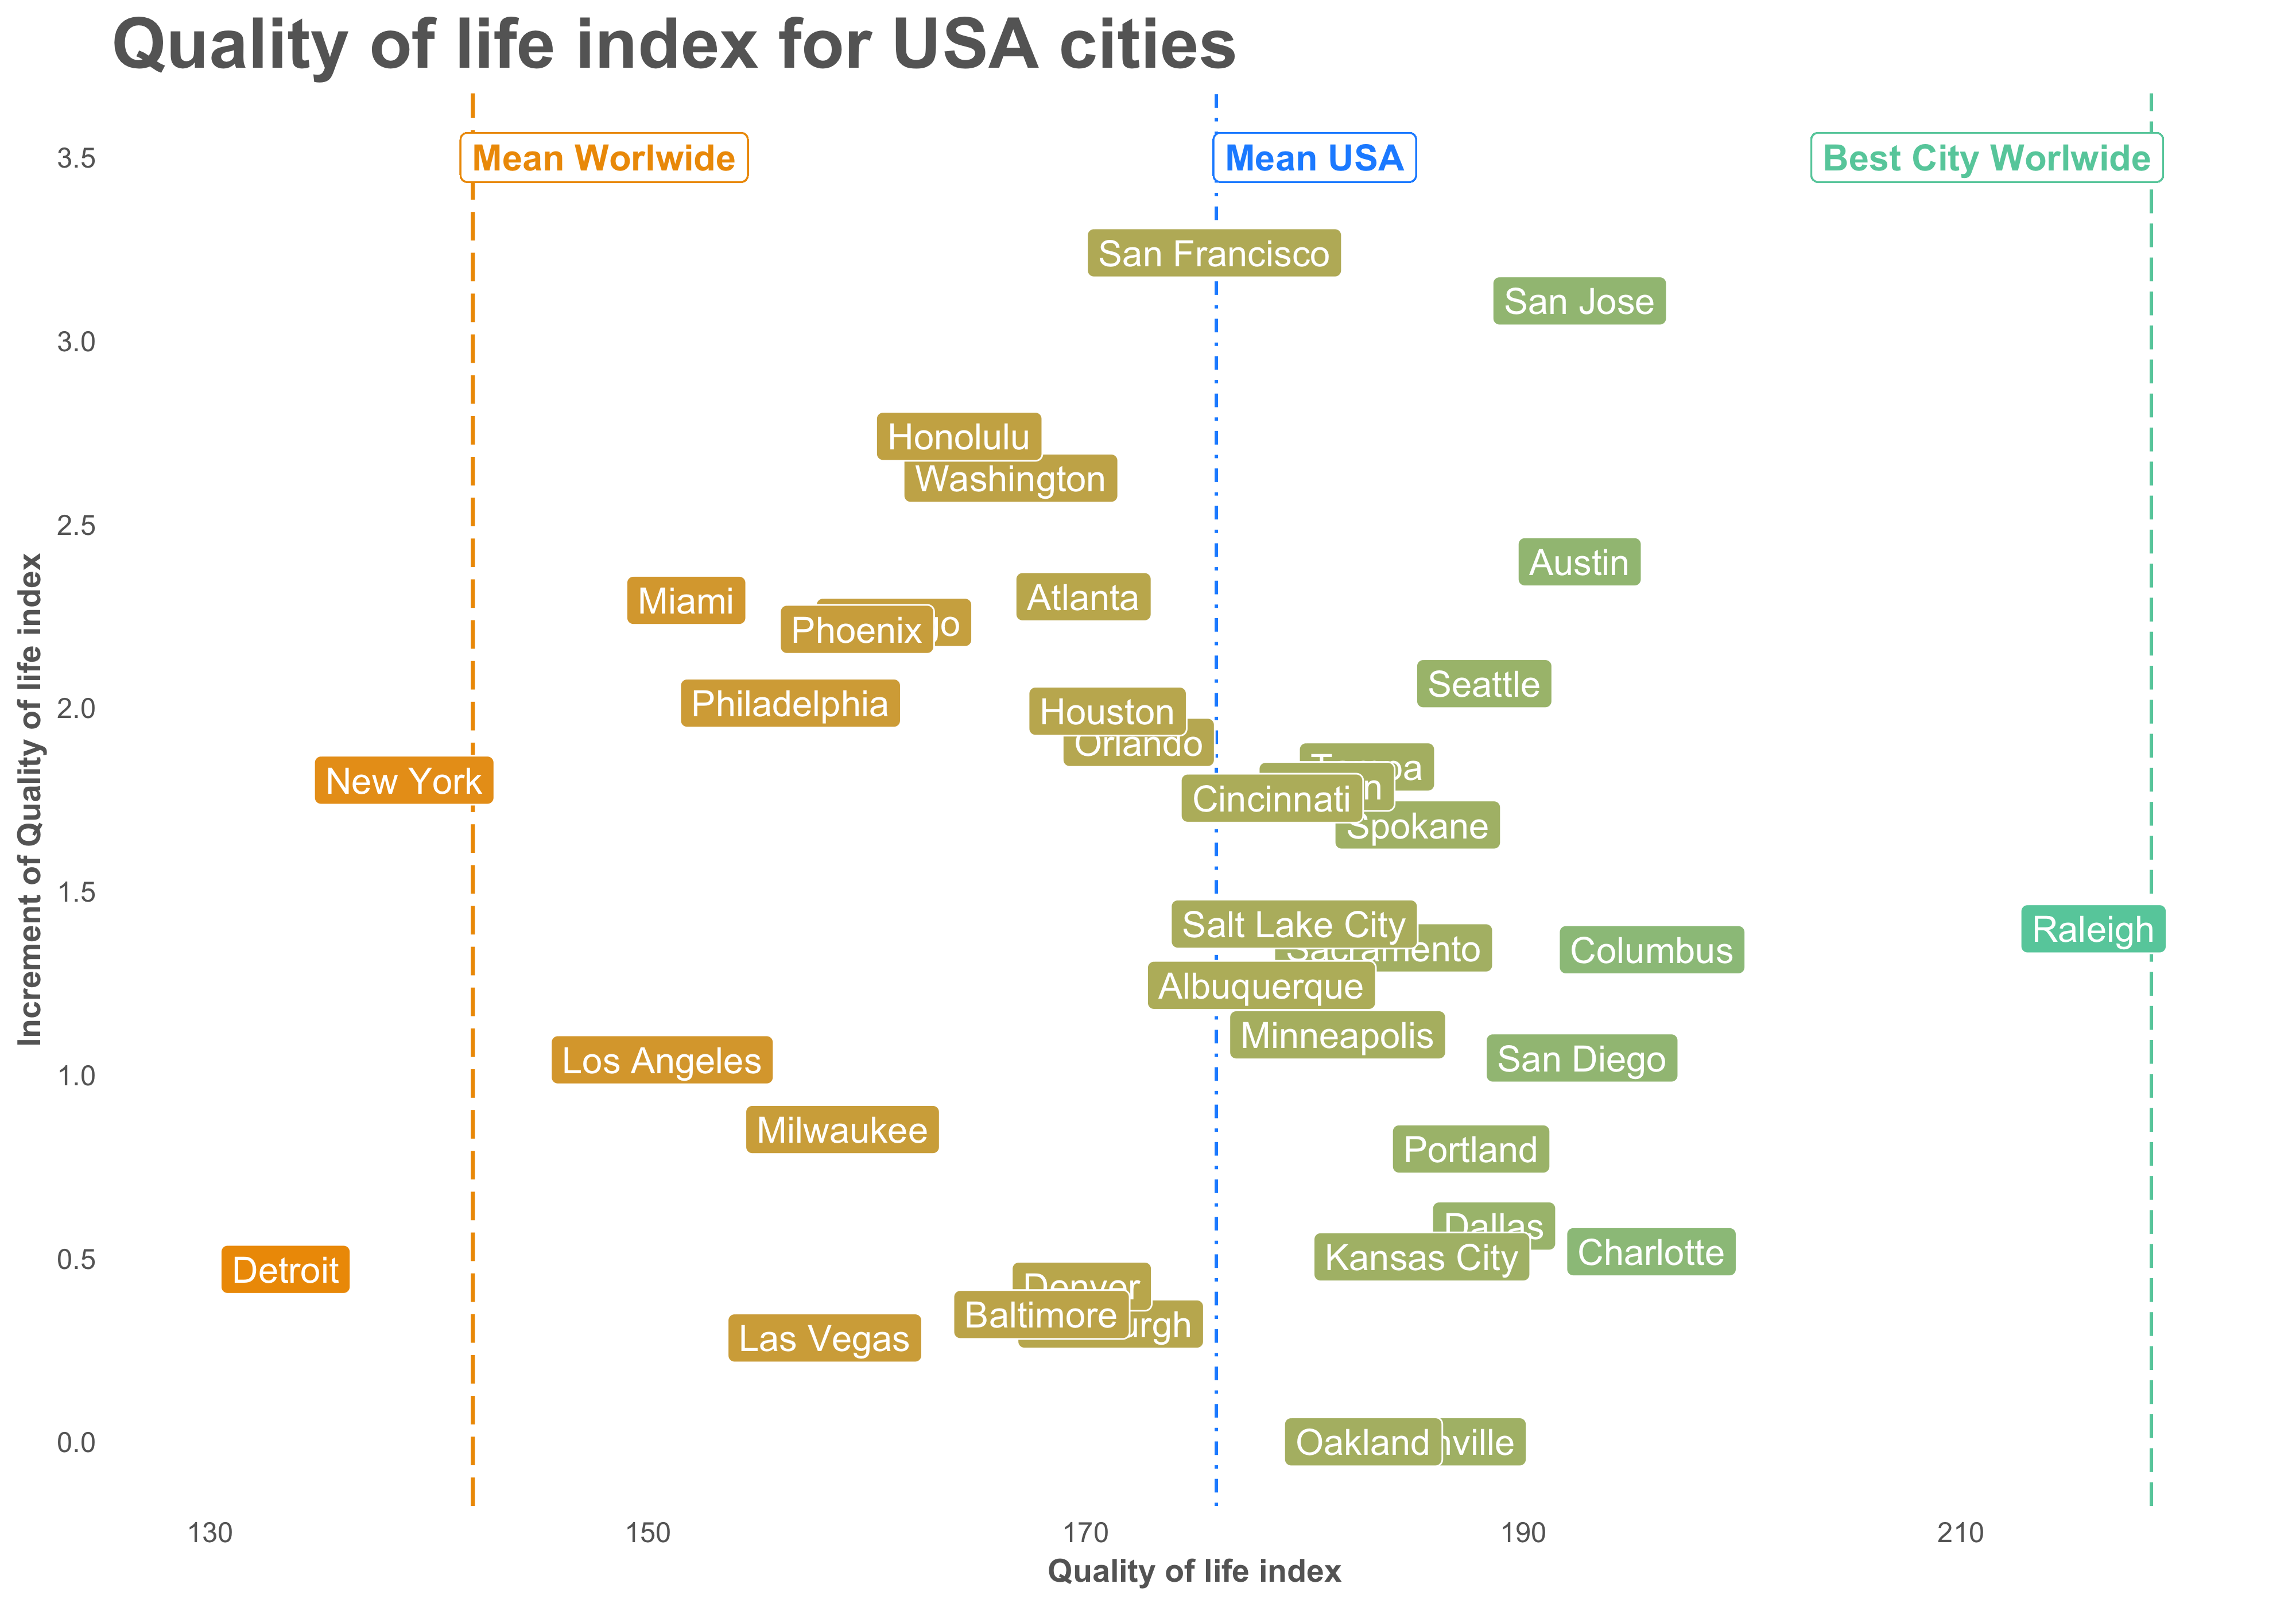

In [110]:
%%R -i df_variances -i df_qlife_10cities  -i mean_worlwide -i mean_USA -i max_worlwide    -w 10 -h 7 --units in -r 400

library(ggplot2)
ggplot()+

geom_vline(xintercept = mean_worlwide, color = "orange2", size=0.6,linetype="longdash")+ #MEAN WORLWIDE
geom_vline(xintercept = max_worlwide, color = "aquamarine3", size=0.5,linetype="longdash")+ #BEST WORLWIDE: CANBERRA+
geom_vline(xintercept = mean_USA, color = "dodgerblue1", size=0.5,linetype="dotdash")+ #MEAN USA


geom_label(data=df_variances, aes(x=kpi_201912, y=mean_var_porc, label=City_name,  fill=kpi_201912), colour="white",size=4)+
scale_fill_gradient(low = "orange2", high = "aquamarine3")+
geom_label(data=df_variances, aes(x=mean_worlwide+6, y=3.5), label="Mean Worlwide", size=4, colour="orange2", fontface="bold")+
geom_label(data=df_variances, aes(x=mean_USA+4.5, y=3.5), label="Mean USA", size=4, colour="dodgerblue1",fontface="bold")+
geom_label(data=df_variances, aes(x=max_worlwide-7.5, y=3.5), label="Best City Worlwide", size=4, colour="aquamarine3",fontface="bold")+


scale_y_continuous(limits = c(0, 3.5), breaks = seq(0, 3.5, by = 0.5))+
scale_x_continuous(limits = c(130, 220), breaks = seq(130, 220, by = 20))+

ggtitle("Quality of life index for USA cities") +

theme_minimal()+
theme(
  plot.title = element_text(color="grey40", size=22, face="bold"),
  panel.grid.major = element_line(colour = "white"),
  panel.grid.minor = element_line(colour = "white"),
  axis.text.x = element_text(colour = "grey40"),
  axis.text.y = element_text(colour = "grey40"),
  axis.title.x = element_text(color="grey40", size=10, face="bold"),  
  axis.title.y = element_text(color="grey40", size=10, face="bold"),      
    legend.position="none"
)+
xlab("Quality of life index")+
ylab("Increment of Quality of life index")

## 3. Plot: Quality of life indexes per cities (Second transition)

In [111]:
# Identifying the 10 cities that have the highest number of data science jobs
top10cities_by_jobs=df_cross_jobs_quality.nlargest(10,'Total_jobs')['City']
df_qlife_10cities=df_variances.loc[df_variances.City_name.isin(top10cities_by_jobs)]
df_qlife_othercities=df_variances.loc[~df_variances.City_name.isin(top10cities_by_jobs)]

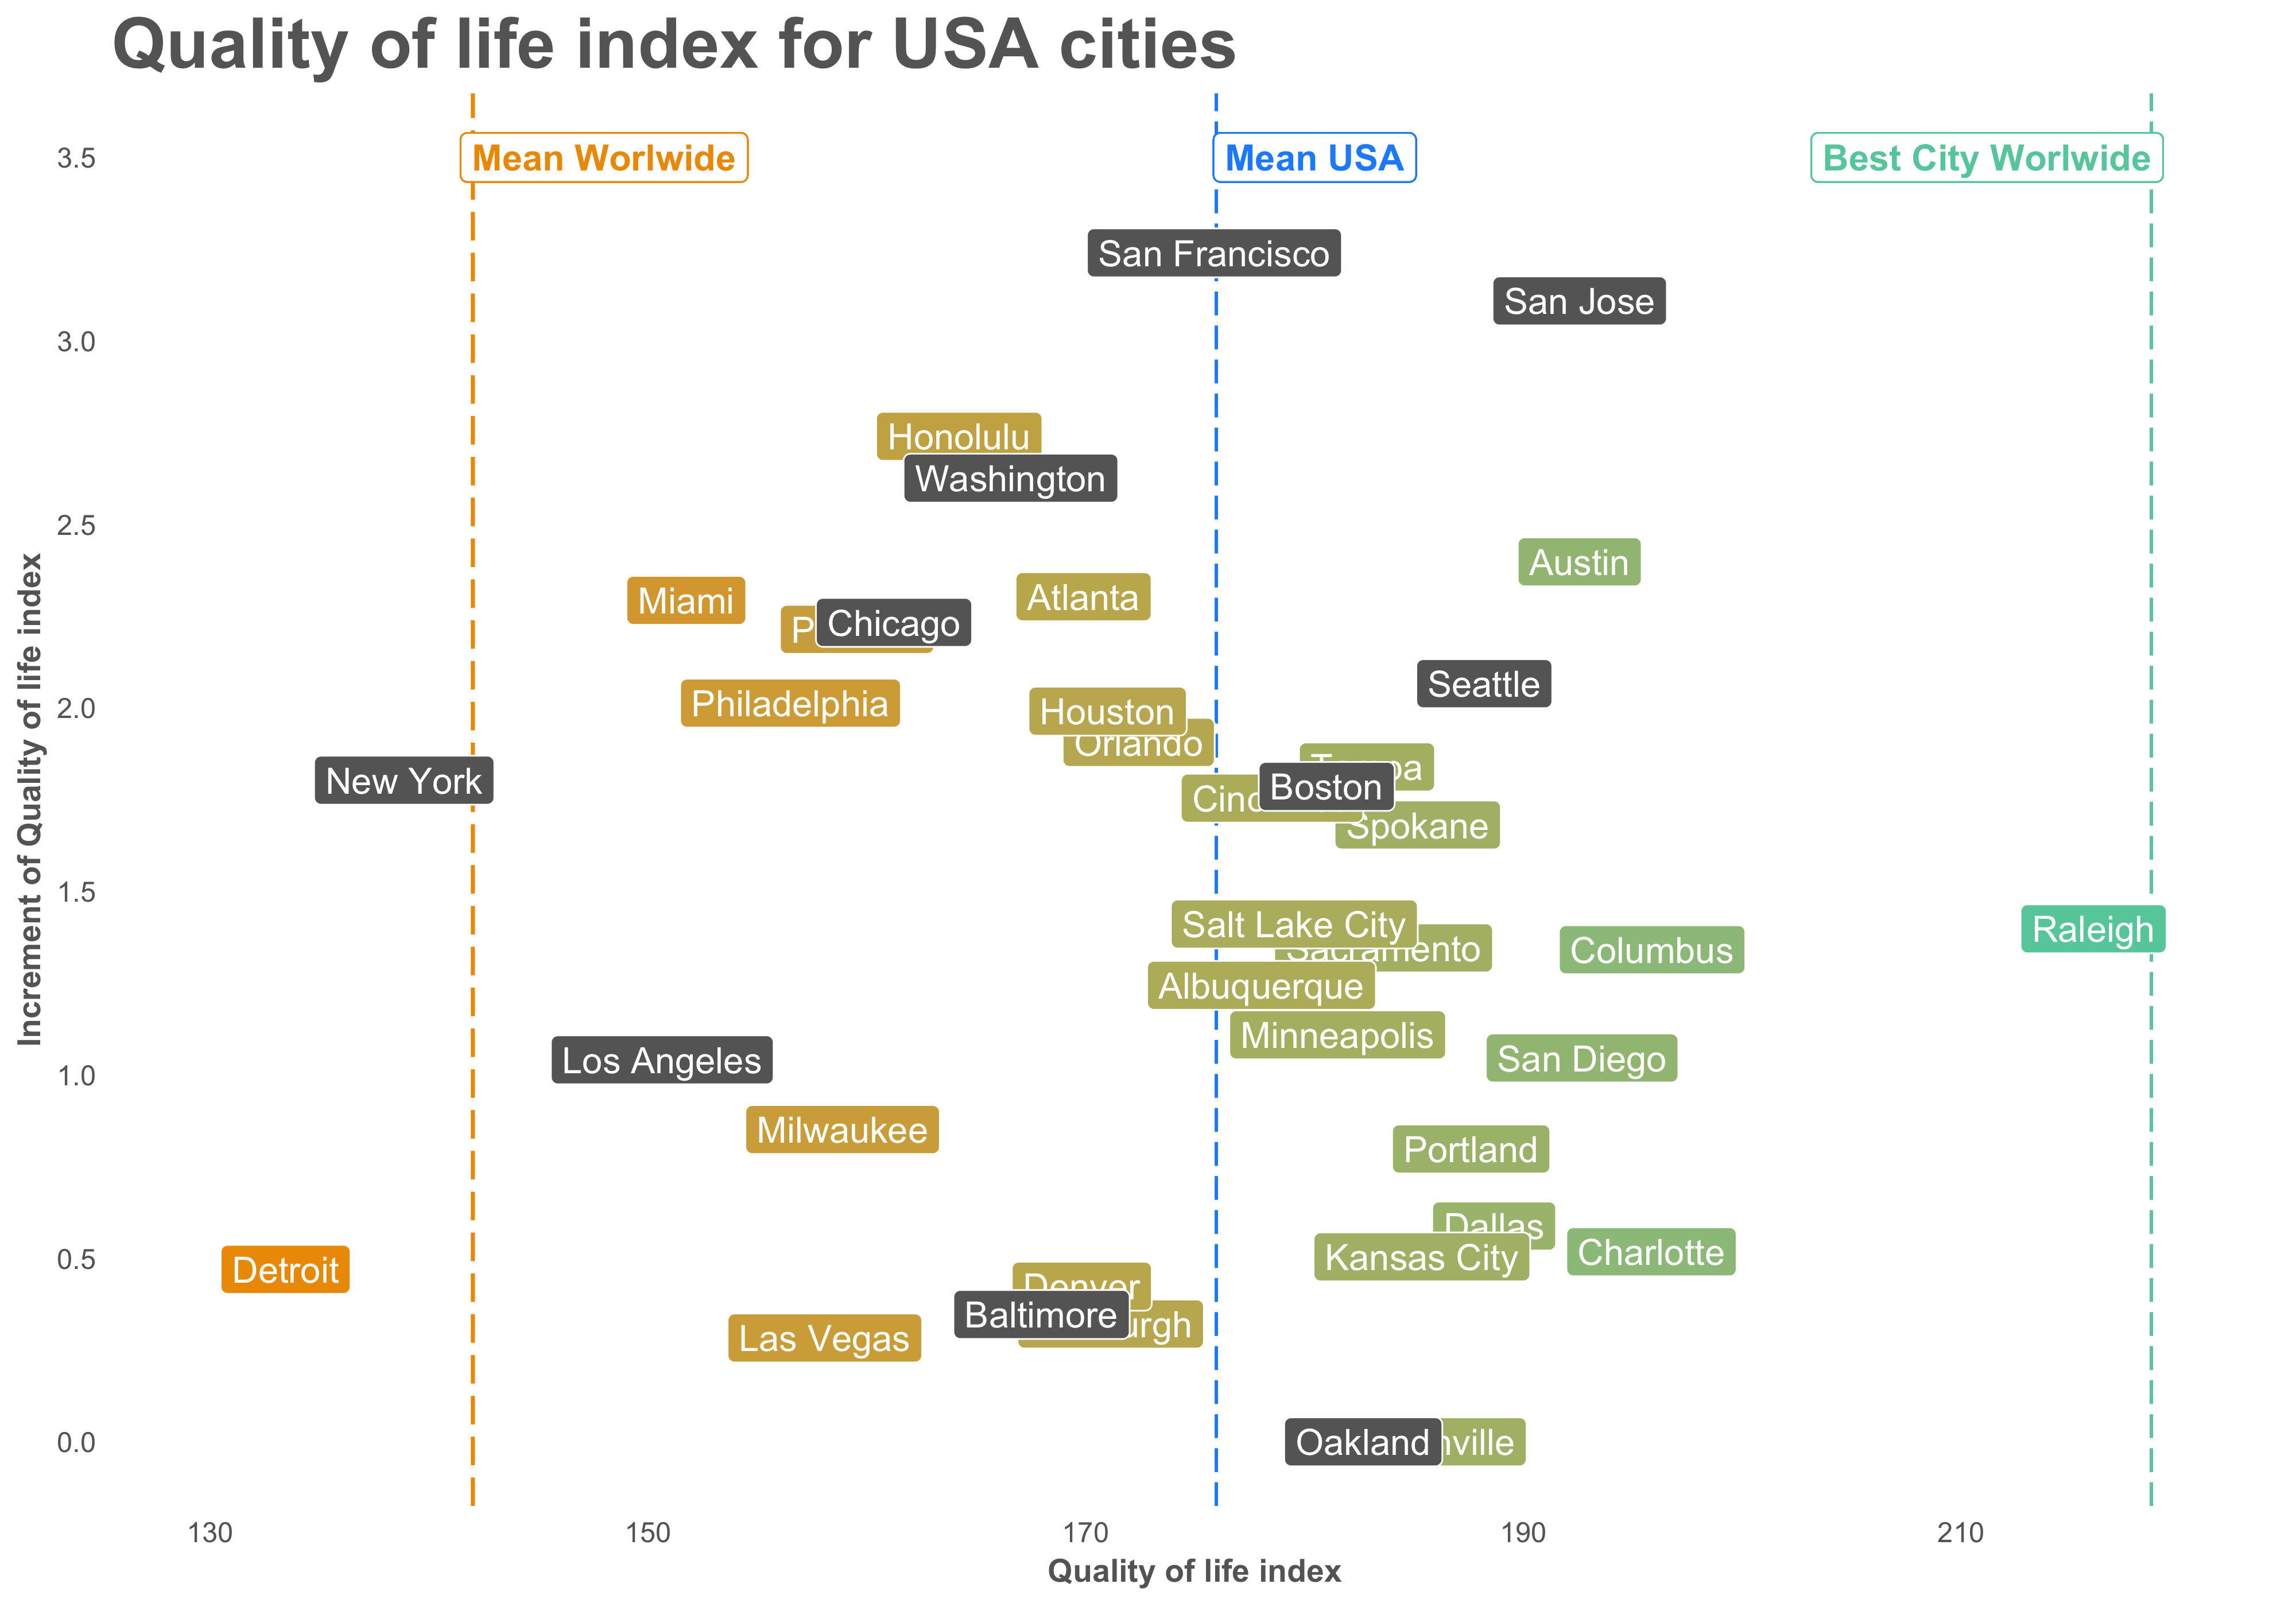

In [112]:
%%R -i df_qlife_10cities -i df_qlife_othercities -i mean_worlwide -i mean_USA -i max_worlwide    -w 10 -h 7 --units in -r 400

library(ggplot2)
ggplot()+

geom_vline(xintercept = mean_worlwide, color = "orange2", size=0.6,linetype="longdash")+ #MEAN WORLWIDE
geom_vline(xintercept = max_worlwide, color = "aquamarine3", size=0.5,linetype="longdash")+ #BEST WORLWIDE: CANBERRA+
geom_vline(xintercept = mean_USA, color = "dodgerblue1", size=0.5,linetype="longdash")+ #MEAN USA

geom_label(data=df_qlife_othercities, aes(x=kpi_201912, y=mean_var_porc, label=City_name,  fill=kpi_201912), colour="white",size=4)+
geom_label(data=df_qlife_10cities, aes(x=kpi_201912, y=mean_var_porc, label=City_name),colour="white", fill="grey40",size=4)+
scale_fill_gradient(low = "orange2", high = "aquamarine3")+
geom_label(data=df_qlife_10cities, aes(x=mean_worlwide+6, y=3.5), label="Mean Worlwide", size=4, colour="orange2", fontface="bold")+
geom_label(data=df_qlife_10cities, aes(x=mean_USA+4.5, y=3.5), label="Mean USA", size=4, colour="dodgerblue1",fontface="bold")+
geom_label(data=df_qlife_10cities, aes(x=max_worlwide-7.5, y=3.5), label="Best City Worlwide", size=4, colour="aquamarine3",fontface="bold")+

scale_y_continuous(limits = c(0, 3.5), breaks = seq(0, 3.5, by = 0.5))+
scale_x_continuous(limits = c(130, 220), breaks = seq(130, 220, by = 20))+

ggtitle("Quality of life index for USA cities") +

theme_minimal()+
theme(
  plot.title = element_text(color="grey40", size=22, face="bold"),
  panel.grid.major = element_line(colour = "white"),
  panel.grid.minor = element_line(colour = "white"),
  axis.text.x = element_text(colour = "grey40"),
  axis.text.y = element_text(colour = "grey40"),
  axis.title.x = element_text(color="grey40", size=10, face="bold"),  
  axis.title.y = element_text(color="grey40", size=10, face="bold"),      
    legend.position="none"
)+
xlab("Quality of life index")+
ylab("Increment of Quality of life index")

## 4. Spider Plot: To compare quality of life between the best country and USA

In [113]:
#Spider plot

df_spider=df_worlwide_normalized.loc[(df_worlwide_normalized.City.isin(['United States','Denmark'])) & (df_worlwide_normalized.Type_kpi!='Quality_life')]
df_spider.loc[df_spider.Type_kpi=='Purchasing','order_kpi']='1'
df_spider.loc[df_spider.Type_kpi=='Safety','order_kpi']='2'
df_spider.loc[df_spider.Type_kpi=='Health_care','order_kpi']='3'
df_spider.loc[df_spider.Type_kpi=='Cost_living','order_kpi']='4'
df_spider.loc[df_spider.Type_kpi=='Property_price_income','order_kpi']='5'
df_spider.loc[df_spider.Type_kpi=='Traffic_commute','order_kpi']='6'
df_spider.loc[df_spider.Type_kpi=='Pollution','order_kpi']='7'
df_spider.loc[df_spider.Type_kpi=='Climate','order_kpi']='8'


labels_axis=['Purchasing','Safety','Health care','Cost of living','Property price/income','Traffic commute','Pollution','Climate']

quality_Denmark=round(df_worlwide_normalized.loc[(df_worlwide_normalized.City=='Denmark') & (df_worlwide_normalized.Type_kpi=='Quality_life')]['Value_kpi'],0)
quality_USA=round(df_worlwide_normalized.loc[(df_worlwide_normalized.City=='United States') & (df_worlwide_normalized.Type_kpi=='Quality_life')]['Value_kpi'],0)


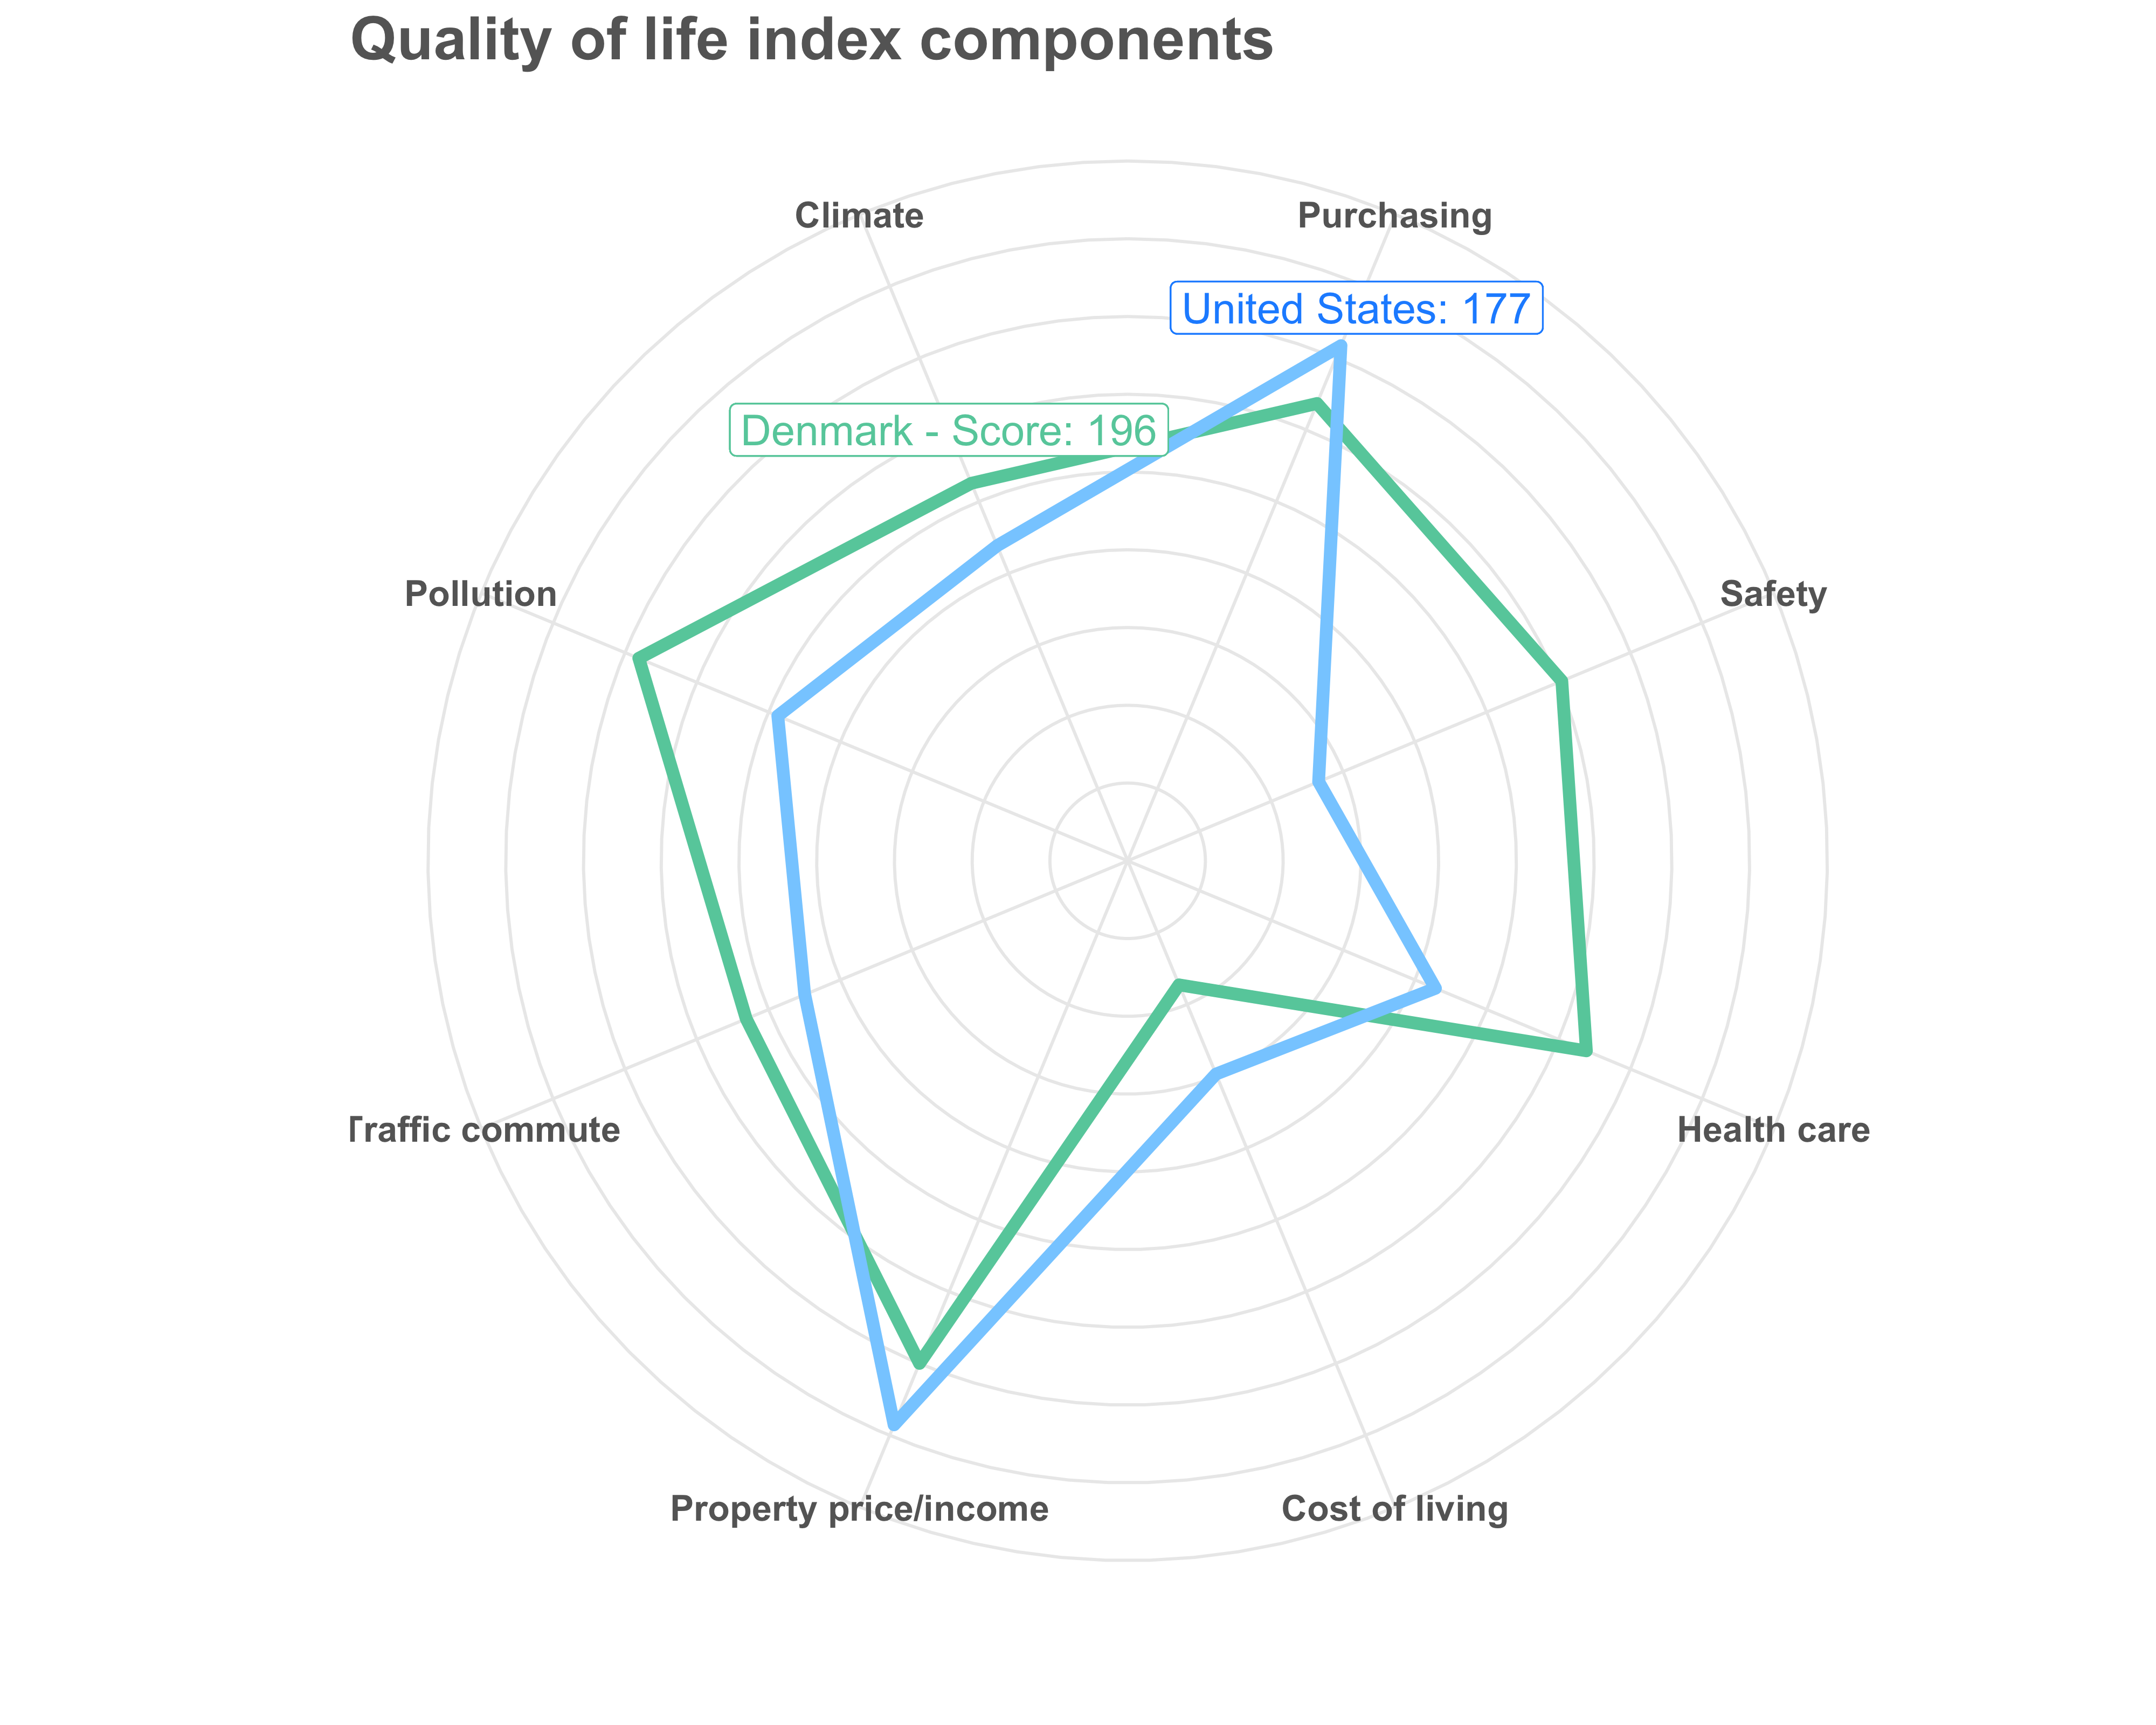

In [114]:
%%R -i df_spider -i labels_axis -i quality_Denmark -i quality_USA   -w 10 -h 8 --units in -r 400

#Function to fix COORD_POLAR plot obtained from the Book: R Programming By Example by Omar Trejo Navaroo
#Chapter 5, page 172.
#I used this function ONLY for closing the radar plot, so, each axis is conected.
coord_radar <- function (theta = "x", start = 0, direction = 1) 
{
    theta <- match.arg(theta, c("x", "y"))
    r <- if (theta == "x") "y" else "x"
    ggproto("Mynewradar", CoordPolar, theta = theta, r = r, start = start, direction = sign(direction),is_linear = function(coord) TRUE)
}
            
ggplot(df_spider, aes(x = order_kpi, y = Kpi_norm)) +

scale_x_discrete(labels=labels_axis)+
scale_y_continuous(limits = c(0.2, 1), breaks = seq(0.2, 1, by = 0.1))+
geom_polygon(aes(group = City, color = City), fill = NA, size = 2, show.legend = FALSE) +
scale_color_manual(values = c('aquamarine3','skyblue1','dodgerblue1'))+  
geom_label(data=df_spider, aes(x=1, y=0.97), label=paste("United States:",quality_USA), size=5, colour="dodgerblue1")+
geom_label(data=df_spider, aes(x=8, y=0.8), label=paste("Denmark - Score:",quality_Denmark), size=5, colour="aquamarine3")+
ggtitle("Quality of life index components") +    
theme_minimal()+            
theme(
  plot.title = element_text(color="grey40", size=20, face="bold"),
 
  axis.text.x = element_text(colour = "grey40", size=12,face="bold"),
  axis.text.y = element_text(colour = "white"),
  axis.title.x = element_text(color="grey40", size=15, face="bold"),  
  axis.title.y = element_text(color="grey40", size=15, face="bold")
)+
xlab("")+
ylab("")+

coord_radar()

   

## Final Plot: Final comparison between data science jobs and quality of life

In [115]:
#Building the table that cross-compare information of quality of life and total number of jobs
df_jobs = pd.read_csv('/Users/ivettesulca/Desktop/EDA_Visualization/Project/Data_jobs.csv')

df_qualitylife=df_variances[['City_name','kpi_201912']]
df_qualitylife.columns=['City','Quality_life']

df_cross_jobs_quality=pd.merge(df_jobs,df_qualitylife,on='City', how='left')
df_cross_jobs_quality['Total_jobs']=df_cross_jobs_quality['Data_Scientist']+df_cross_jobs_quality['Data_Analyst']+df_cross_jobs_quality['Data_Engineer']

mean_jobs=round(df_cross_jobs_quality.Total_jobs.mean(),0)
mean_qlife=round(df_cross_jobs_quality.Quality_life.mean(),0)

life_threshold=5
jobs_threshold=100
df_cross_jobs_quality.loc[(df_cross_jobs_quality.Quality_life>=(mean_qlife-life_threshold)) & (df_cross_jobs_quality.Total_jobs>=(mean_jobs-jobs_threshold)),'flg_bestgroup']='1'
df_cross_jobs_quality.loc[df_cross_jobs_quality.flg_bestgroup.isna(),'flg_bestgroup']='0'

df_cross_best=df_cross_jobs_quality.loc[df_cross_jobs_quality.flg_bestgroup=='1']
df_cross_others=df_cross_jobs_quality.loc[df_cross_jobs_quality.flg_bestgroup=='0']

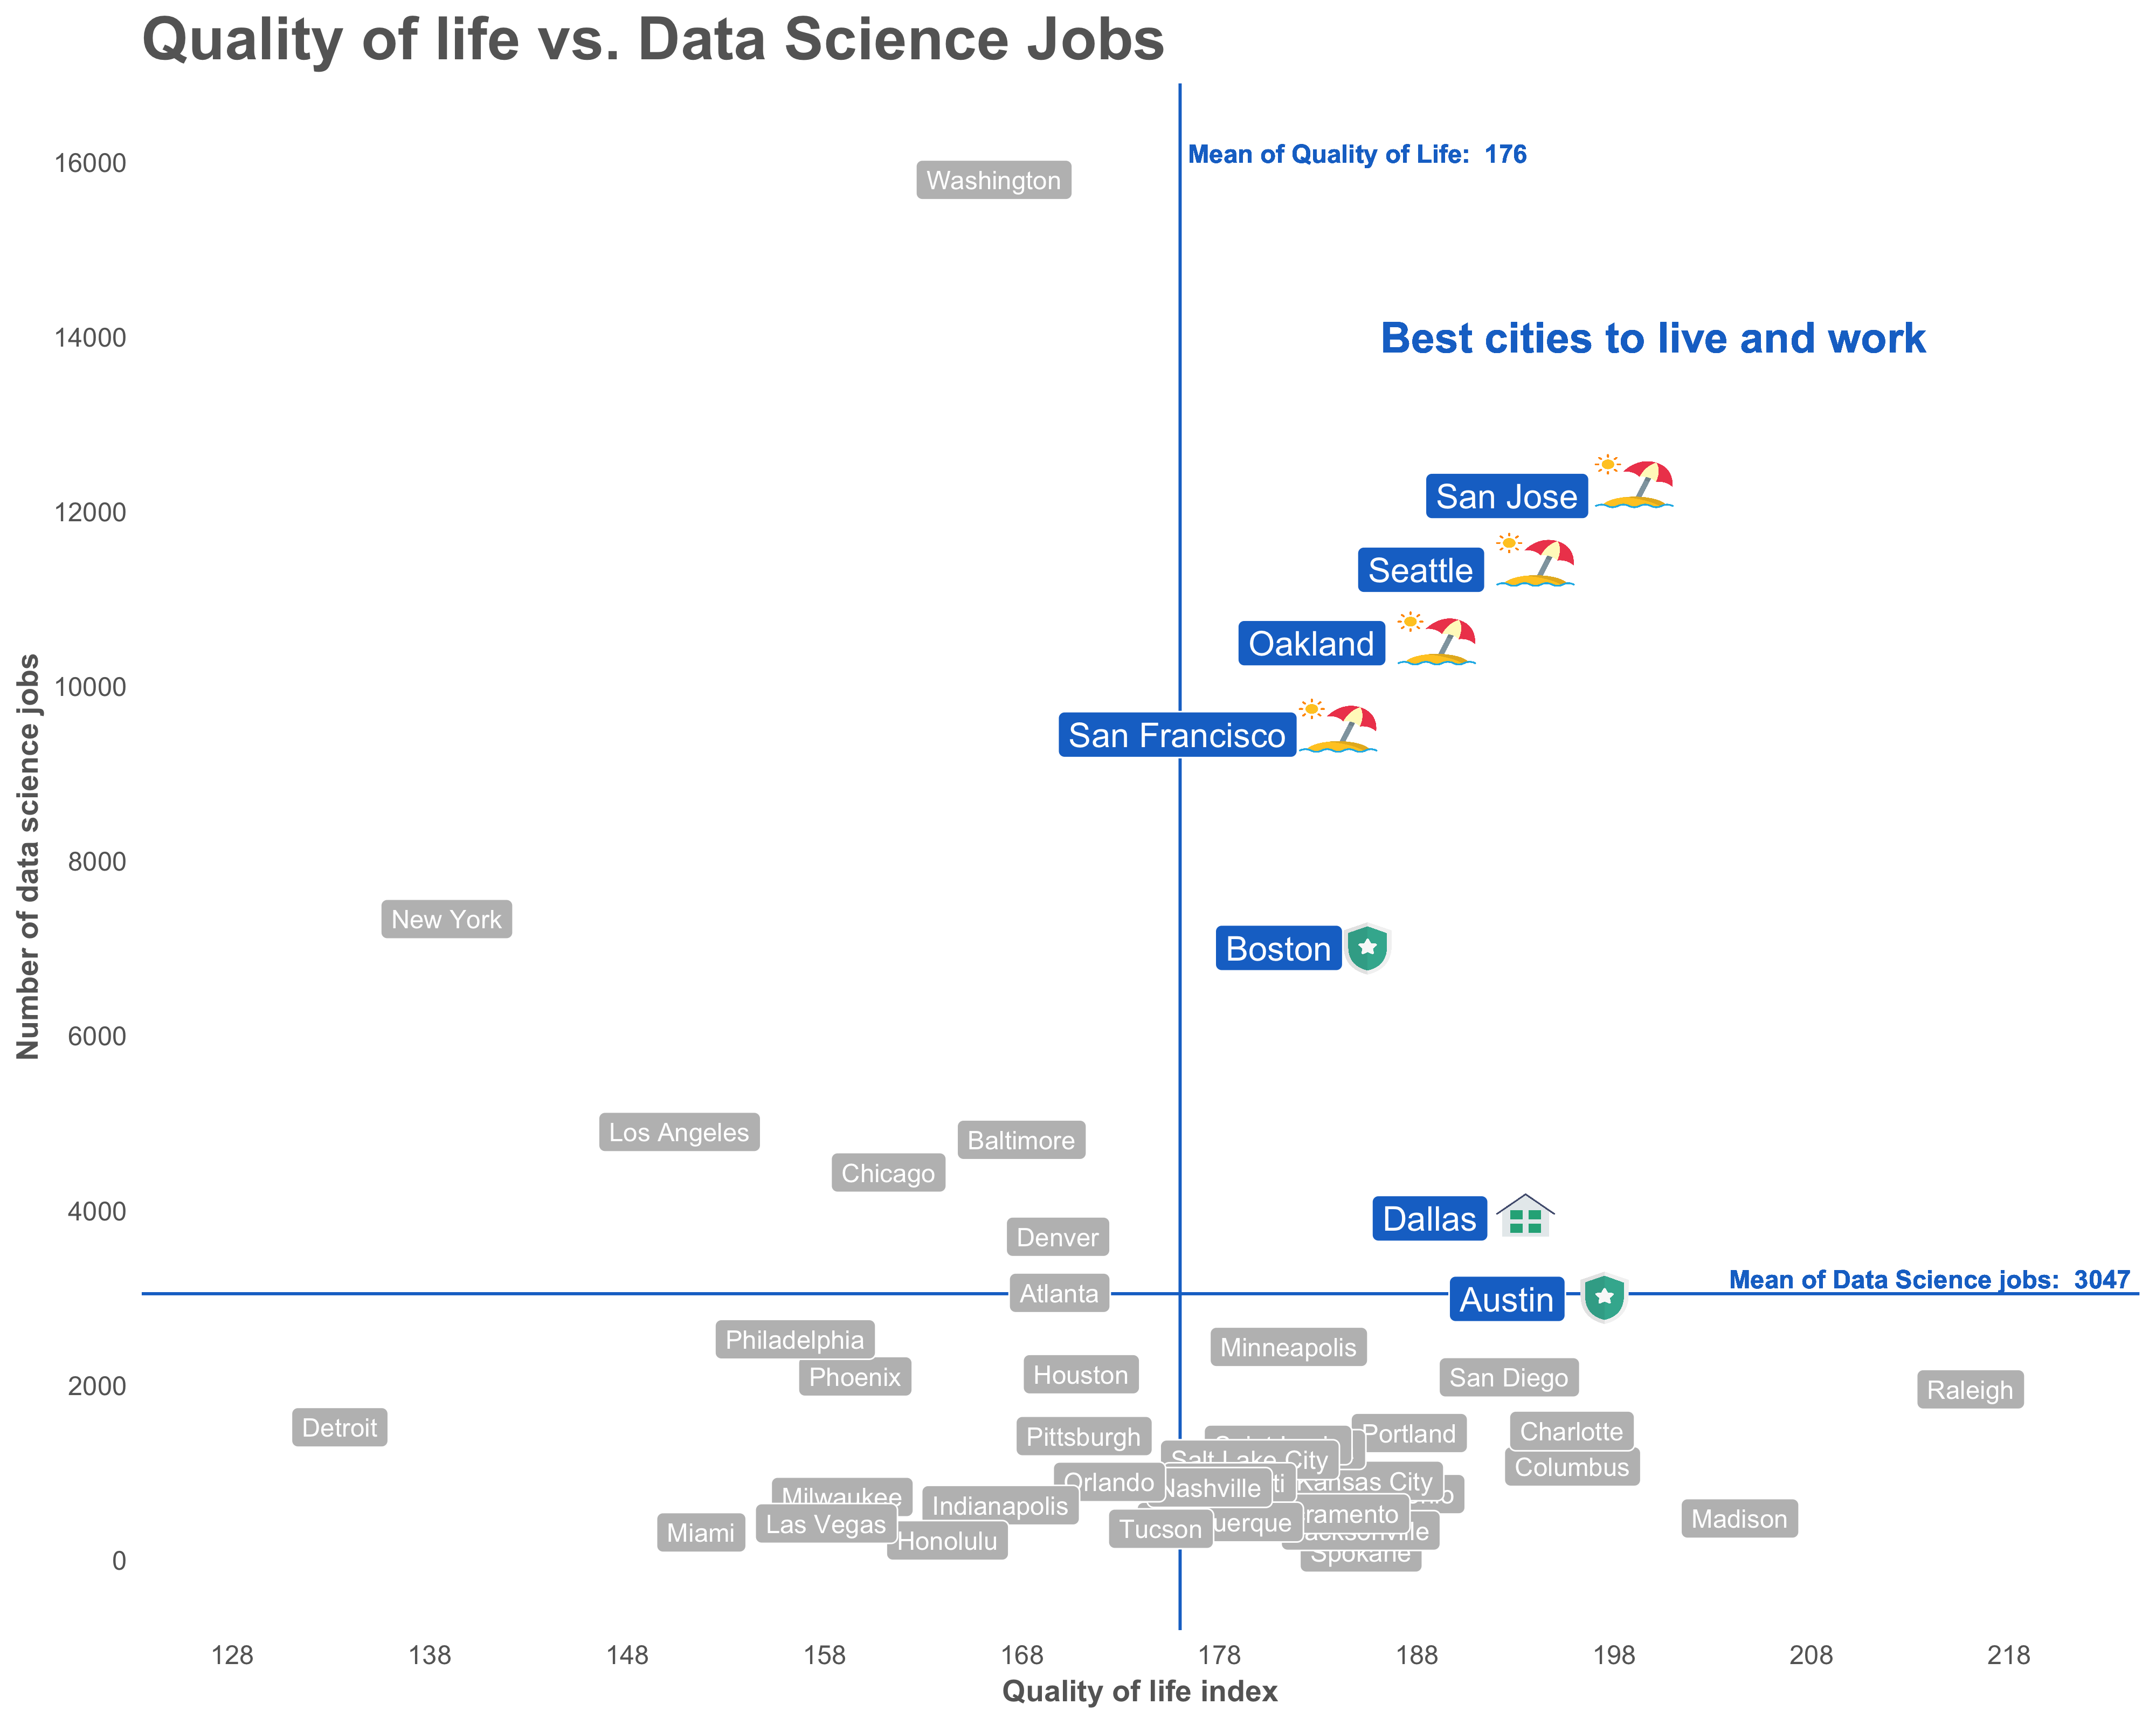

In [116]:
%%R -i df_cross_best -i df_cross_others -i mean_jobs  -i mean_qlife -w 10 -h 8 --units in -r 400
library(png)

climate_img <- readPNG('/Users/ivettesulca/Desktop/EDA_Visualization/Project/climate_3.png')
safety_img <- readPNG('/Users/ivettesulca/Desktop/EDA_Visualization/Project/safety_2.png')
home_img <- readPNG('/Users/ivettesulca/Desktop/EDA_Visualization/Project/home_3.png')

ggplot()+

geom_vline(xintercept = mean_qlife, color = "dodgerblue3", size=0.5,linetype="solid")+
geom_hline(yintercept = mean_jobs, color = "dodgerblue3", size=0.5,linetype="solid")+

geom_point(data=df_cross_best, aes(x=Quality_life, y=Total_jobs))+
geom_label(data=df_cross_best, aes(x=Quality_life, y=Total_jobs, label=City), colour="white", fill="dodgerblue3",size=4)+
geom_label(data=df_cross_others, aes(x=Quality_life, y=Total_jobs, label=City), colour="white", fill="grey",size=3)+

geom_text(data=df_cross_best, aes(x=214, y=mean_jobs+170), label=paste("Mean of Data Science jobs: ",mean_jobs), colour="dodgerblue3", size=3, fontface="bold")+
geom_text(data=df_cross_best, aes(x=mean_qlife+9, y=16100), label=paste("Mean of Quality of Life: ",mean_qlife), colour="dodgerblue3", size=3, fontface="bold")+


geom_text(data=df_cross_best, aes(x=200, y=14000), label="Best cities to live and work", colour="dodgerblue3", size=5, fontface="bold")+

scale_y_continuous(limits = c(0, 16100), breaks = seq(0, 16100, by = 2000))+
scale_x_continuous(limits = c(128, 220), breaks = seq(128, 220, by = 10))+

#images for the best cities
#San Jose
annotation_raster(climate_img, ymin = 12000,ymax= 12700,xmin = 197,xmax = 201)+
#Seatlle
annotation_raster(climate_img, ymin = 11100,ymax= 11800,xmin = 192,xmax = 196)+
#Oakland
annotation_raster(climate_img, ymin = 10200,ymax= 10900,xmin = 187,xmax = 191)+
#San Francisco
annotation_raster(climate_img, ymin = 9200,ymax= 9900,xmin = 182,xmax = 186)+

#Boston
annotation_raster(safety_img, ymin =6700 ,ymax= 7300,xmin = 184,xmax = 187)+
#Austin
annotation_raster(safety_img, ymin =2700 ,ymax= 3300,xmin = 196,xmax = 199)+
#Dallas
annotation_raster(home_img, ymin = 3700,ymax= 4200,xmin = 192,xmax = 195)+

ggtitle("Quality of life vs. Data Science Jobs") + 

theme_minimal()+
theme(
  plot.title = element_text(color="grey40", size=20, face="bold"),
  panel.grid.major = element_line(colour = "white"),
  panel.grid.minor = element_line(colour = "white"),
  axis.text.x = element_text(colour = "grey40"),
  axis.text.y = element_text(colour = "grey40"),
  axis.title.x = element_text(color="grey40", size=10, face="bold"),  
  axis.title.y = element_text(color="grey40", size=10, face="bold"),      
    legend.position="none"
)+
ylab("Number of data science jobs")+
xlab("Quality of life index")